# Plato's Pizza Analysis

#### Data Origin
https://mavenanalytics.io/data-playground?search=pizza
#### Original CSV's
- orders.csv
- order_details.csv
- pizzas.csv
- pizza_types.csv

### Importing Data Sets

In [2]:
# Order Details CSV
# Importing pandas, reading csv, creating dataframe, printing last frames.
import pandas as pd
order_details = pd.read_csv('order_details.csv', index_col='order_details_id')
order_details.tail(5)

,order_id,pizza_id,quantity
order_details_id,,,
48616,21348,ckn_alfredo_m,1
48617,21348,four_cheese_l,1
48618,21348,napolitana_s,1
48619,21349,mexicana_l,1
48620,21350,bbq_ckn_s,1


In [3]:
#Orders CSV
# Reading csv, creating dataframe, printing last frames.
# Date and time columns separated, pulling them together with proper format.
orders = pd.read_csv('orders.csv', index_col='order_id', parse_dates = [['date', 'time']])
orders.tail()

,date_time
order_id,
21346,2015-12-31 20:51:07
21347,2015-12-31 21:14:37
21348,2015-12-31 21:23:10
21349,2015-12-31 22:09:54
21350,2015-12-31 23:02:05


In [5]:
# Pizzas CSV
# Loading csv, creating dataframe, printing last frames.
pizzas = pd.read_csv('pizzas.csv', index_col='pizza_id')
pizzas.tail()

,pizza_type_id,size,price
pizza_id,,,
spinach_fet_m,spinach_fet,M,16.00
spinach_fet_l,spinach_fet,L,20.25
veggie_veg_s,veggie_veg,S,12.00
veggie_veg_m,veggie_veg,M,16.00
veggie_veg_l,veggie_veg,L,20.25


In [51]:
#Pizza_type CSV
# Reading CSV, creating dataframe no index, printing
pizza_types = pd.read_csv('pizza_types.csv', index_col='pizza_type_id', encoding='unicode_escape')
pizza_types.tail()

,name,category,ingredients
pizza_type_id,,,
mediterraneo,The Mediterranean Pizza,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
mexicana,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
spin_pesto,The Spinach Pesto Pizza,Veggie,"Spinach, Artichokes, Tomatoes, Sun-dried Tomat..."
spinach_fet,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
veggie_veg,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


## Exploratory Analysis
### Order Details Dataframe

In [28]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 1 to 48620
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  48620 non-null  int64 
 1   pizza_id  48620 non-null  object
 2   quantity  48620 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


- The Order Details Dataframe has 48620 entries.
- There are no null values in this Dataframe.

In [29]:
order_details.duplicated().sum()

0

- There is no duplicate entries in this Dataframe.

In [30]:
order_details.nunique()

order_id    21350
pizza_id       91
quantity        4
dtype: int64

In [ ]:
- Too many unique entries in the object column to categorize.

#### Order Details Dataframe
|Table |Column |Data Type |Description |Key|
|-------|---------|-----------|-----------|---|
|Order Details|order_details_id|int64|Numerical designation for each unique pizza per order.|X|
|Order Details|order_id|int64|Numerical designation for each order, which may contain multiple pizzas.||
|Order Details|pizza_id|object|Snakecase combination of pizza name and size designation(S,M, or L).||
|Order Details|quantity|int64|Sum of how many of a particular pizza per order.||

### Orders Dataframe

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21350 entries, 1 to 21350
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 333.6 KB


- The Orders Dataframe has 21350 entries.
- There are no null values in the Dataframe.

In [11]:
orders.duplicated().sum()

0

- There are no duplicated entries in this Dataframe. 

__Question: How many customers do we have each day? Are there any peak hours?__
- We will need to categorize the dates by days of the week. We will also need hours alone for calculation.

__Question: How much money did we make this year? Can we identify any seasonality in the sales?__
- We will also need to categorize the month.


In [15]:
'''https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.date.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day_name.html#pandas.Series.dt.day_name'''

orders['month'] = orders['date_time'].dt.month_name()
orders['day'] = orders['date_time'].dt.day_name()
orders['hour'] = orders['date_time'].dt.hour
orders['week'] = orders['date_time'].dt.isocalendar().week
orders.tail()

,date_time,month,day,hour,week
order_id,,,,,
21346,2015-12-31 20:51:07,December,Thursday,20,53
21347,2015-12-31 21:14:37,December,Thursday,21,53
21348,2015-12-31 21:23:10,December,Thursday,21,53
21349,2015-12-31 22:09:54,December,Thursday,22,53
21350,2015-12-31 23:02:05,December,Thursday,23,53


In [19]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21350 entries, 1 to 21350
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
 1   month      21350 non-null  object        
 2   day        21350 non-null  object        
 3   hour       21350 non-null  int64         
 4   week       21350 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int64(1), object(2)
memory usage: 3.2 MB


- Dataframe is utilizing 3.2 MB of memory.

In [21]:
orders.memory_usage(deep = True)

Index         170800
date_time     170800
month        1347224
day          1369889
hour          170800
week          106750
dtype: int64

- It's the "month" and "day" columns utilizing the most memory.

In [22]:
orders.nunique()

date_time    21350
month           12
day              7
hour            15
week            53
dtype: int64

- The "month" and "day" columns have few unique values. Converting to a categorical data type will improve performance.

In [25]:
#https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html

orders['month'] = pd.Categorical(
    values = orders['month'], 
    categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    ordered = True
)

In [26]:
orders['day'] = pd.Categorical(
    values = orders['day'],
    categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered = True
)

In [27]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21350 entries, 1 to 21350
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  21350 non-null  datetime64[ns]
 1   month      21350 non-null  category      
 2   day        21350 non-null  category      
 3   hour       21350 non-null  int64         
 4   week       21350 non-null  UInt32        
dtypes: UInt32(1), category(2), datetime64[ns](1), int64(1)
memory usage: 648.1 KB


- 648.1 KB is the improvement! 

#### Orders Dataframe
|Table |Column |Data Type |Description |Key|
|-------|---------|-----------|-----------|---|
|orders|order_id|int64|Numerical designation for each individual order.|X|
|orders|date_time|datetime64[ns]|The date and time an orders is placed. Prior to cooking and serving.||
|orders|month|category|Months by name, Julian calendar, January - December.||
|orders|day|category|Days of the week by name, Monday - Sunday.||
|orders|hour|int64|24-Hour Clock.||
|orders|week|UInt32|52 weeks in the year.||

### Pizzas CSV

In [33]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, bbq_ckn_s to veggie_veg_l
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_type_id  96 non-null     object 
 1   size           96 non-null     object 
 2   price          96 non-null     float64
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


- Pizza Dataframe has 96 entries.
- There are no null values in this Dataframe.

In [34]:
pizzas.duplicated().sum()

0

- There are no duplicated entries in this Dataframe.

In [35]:
pizzas.nunique()

pizza_type_id    32
size              5
price            27
dtype: int64

- Size column is a good candidate for a categorical data type.

In [37]:
pizzas['size'].unique()

array(['S', 'M', 'L', 'XL', 'XXL'], dtype=object)

In [38]:
pizzas['size'] = pd.Categorical(
    values = pizzas['size'],
    categories = ['S', 'M', 'L', 'XL', 'XXL'],
    ordered = True
)

In [40]:
pizzas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, bbq_ckn_s to veggie_veg_l
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   pizza_type_id  96 non-null     object  
 1   size           96 non-null     category
 2   price          96 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 2.6+ KB


#### Pizzas Dataframe
|Table |Column |Data Type |Description |Key|
|-------|---------|-----------|-----------|---|
|pizzas|pizza_id|object|Camelcase pizza name and size combined.|X|
|pizzas|pizza_type_id|object|Pizza name only.||
|pizzas|size|category|Size of the pizza only.||
|pizzas|price|float64|Price of the pizza based on name and size.||

### Pizza Types CSV

In [43]:
pizza_types.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, bbq_ckn to veggie_veg
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         32 non-null     object
 1   category     32 non-null     object
 2   ingredients  32 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


- There are 32 entries in the Pizza Types Dataframe.
- There are no null values in this Dataframe.

In [44]:
pizza_types.duplicated().sum()

0

- There are no duplicated entries in this Dataframe.

In [45]:
pizza_types.nunique()

name           32
category        4
ingredients    32
dtype: int64

- 'Category' column is a candidate for the categorical type.
    - 'Category' also consists of nominal data, as they're label objects with no hierarchy.

In [48]:
pizza_types['category'] = pd.Categorical(
    values = pizza_types['category']
)

In [49]:
pizza_types['name'].unique()

array(['The Barbecue Chicken Pizza', 'The California Chicken Pizza',
       'The Chicken Alfredo Pizza', 'The Chicken Pesto Pizza',
       'The Southwest Chicken Pizza', 'The Thai Chicken Pizza',
       'The Big Meat Pizza', 'The Classic Deluxe Pizza',
       'The Hawaiian Pizza', 'The Italian Capocollo Pizza',
       'The Napolitana Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Pepperoni Pizza', 'The Greek Pizza', 'The Brie Carre Pizza',
       'The Calabrese Pizza', 'The Italian Supreme Pizza',
       'The Pepper Salami Pizza', 'The Prosciutto and Arugula Pizza',
       'The Sicilian Pizza', 'The Soppressata Pizza',
       'The Spicy Italian Pizza', 'The Spinach Supreme Pizza',
       'The Five Cheese Pizza', 'The Four Cheese Pizza',
       'The Green Garden Pizza', 'The Italian Vegetables Pizza',
       'The Mediterranean Pizza', 'The Mexicana Pizza',
       'The Spinach Pesto Pizza', 'The Spinach and Feta Pizza',
       'The Vegetables + Vegetables Pizza'

- The word 'Pizza' is redundant. 

In [50]:
pizza_types['name'] = pizza_types['name'].str.replace(pat = 'Pizza', repl = '')
pizza_types['name'].unique()

array(['The Barbecue Chicken ', 'The California Chicken ',
       'The Chicken Alfredo ', 'The Chicken Pesto ',
       'The Southwest Chicken ', 'The Thai Chicken ', 'The Big Meat ',
       'The Classic Deluxe ', 'The Hawaiian ', 'The Italian Capocollo ',
       'The Napolitana ', 'The Pepperoni, Mushroom, and Peppers ',
       'The Pepperoni ', 'The Greek ', 'The Brie Carre ',
       'The Calabrese ', 'The Italian Supreme ', 'The Pepper Salami ',
       'The Prosciutto and Arugula ', 'The Sicilian ', 'The Soppressata ',
       'The Spicy Italian ', 'The Spinach Supreme ', 'The Five Cheese ',
       'The Four Cheese ', 'The Green Garden ', 'The Italian Vegetables ',
       'The Mediterranean ', 'The Mexicana ', 'The Spinach Pesto ',
       'The Spinach and Feta ', 'The Vegetables + Vegetables '],
      dtype=object)

## The vis_pizza Dataframe
- Combining all 4 Dataframes for visualization.

In [53]:
# Orders DF matches Order_details DF on 'order_id' column.
vis_pizza = order_details.merge(right = orders, how = 'inner', on = 'order_id')
# Adding Pizzas DF, key is 'pizza_id' from Order_details DF.
vis_pizza = vis_pizza.merge(right = pizzas, how = 'left', on = 'pizza_id')
# Adding Pizza_types DF matching 'pizza_type_id' from Pizzas DF.
vis_pizza = vis_pizza.merge(right = pizza_types, how = 'left', on = 'pizza_type_id')
vis_pizza.tail()

,order_id,pizza_id,quantity,date_time,month,day,hour,week,pizza_type_id,size,price,name,category,ingredients
48615,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,December,Thursday,21,53,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,21348,four_cheese_l,1,2015-12-31 21:23:10,December,Thursday,21,53,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,21348,napolitana_s,1,2015-12-31 21:23:10,December,Thursday,21,53,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,21349,mexicana_l,1,2015-12-31 22:09:54,December,Thursday,22,53,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
48619,21350,bbq_ckn_s,1,2015-12-31 23:02:05,December,Thursday,23,53,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [54]:
vis_pizza.index.names = ['entry']

__Question: What's our average order value? Do we have any bestsellers? How much money did we make this year? Can we identify any seasonality in the sales?__
- We need to create a revenue column that calculates total dollars for each entry.

In [55]:
vis_pizza['revenue'] = vis_pizza['quantity']*vis_pizza['price']

In [56]:
vis_pizza.tail()

,order_id,pizza_id,quantity,date_time,month,day,hour,week,pizza_type_id,size,price,name,category,ingredients,revenue
entry,,,,,,,,,,,,,,,
48615,21348,ckn_alfredo_m,1,2015-12-31 21:23:10,December,Thursday,21,53,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",16.75
48616,21348,four_cheese_l,1,2015-12-31 21:23:10,December,Thursday,21,53,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95
48617,21348,napolitana_s,1,2015-12-31 21:23:10,December,Thursday,21,53,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",12.00
48618,21349,mexicana_l,1,2015-12-31 22:09:54,December,Thursday,22,53,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25
48619,21350,bbq_ckn_s,1,2015-12-31 23:02:05,December,Thursday,23,53,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",12.75


## Answering Questions
__1. How many customers do we have each day? Are there any peak hours?__

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

busy_days = vis_pizza.groupby(by='day', as_index = False)['quantity'].sum()

In [71]:
color_graph = '#EB8C34'

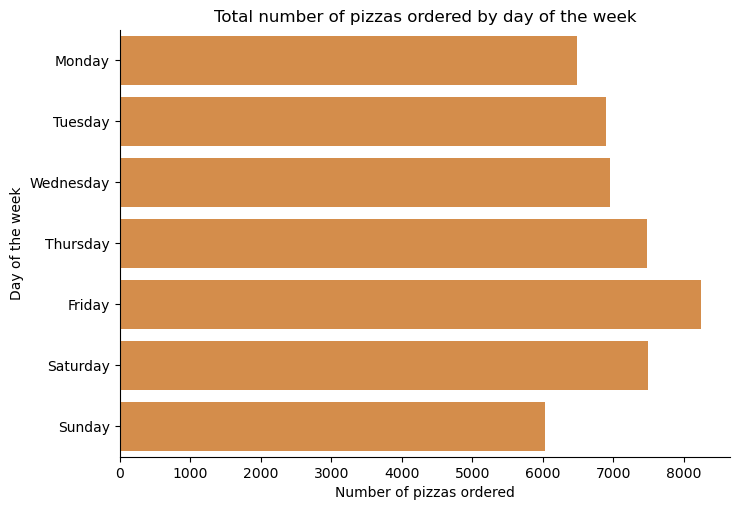

In [72]:
busy_g = sns.catplot(data = busy_days, x = 'quantity', y = 'day', kind = 'bar', color = color_graph, aspect = 1.5)
busy_g.set(title = 'Total number of pizzas ordered by day of the week')
busy_g.set(xlabel = 'Number of pizzas ordered', ylabel = 'Day of the week')
plt.show()

- The three __busiest days__ look to be __Thursday, Friday and Saturday__ based on the number of pizzas ordered.
